In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt

IN_PATH  = os.path.join("..", "data", "processed", "spy_labeled.csv")
OUT_PATH = os.path.join("..", "data", "processed", "spy_features_step4.csv")

In [3]:
df = pd.read_csv(IN_PATH, parse_dates=["Date"], date_format="%Y-%m-%d")

df.head()

,Date,Close,High,Low,Open,Volume,return_1d,y
0,2010-01-04,85.515656,85.560928,84.142335,84.791267,118944600,0.002647,1
1,2010-01-05,85.742020,85.779751,85.153454,85.462832,111579900,0.000704,1
2,2010-01-06,85.802368,86.013647,85.591089,85.658998,116074400,0.004221,1
3,2010-01-07,86.164558,86.270198,85.402439,85.643902,131091100,0.003328,1
4,2010-01-08,86.451294,86.489025,85.764637,85.938185,126402800,0.001396,1


In [4]:
for w in [5, 10, 20]:
    df[f"sma_{w}"] = df["Close"].rolling(window=w, min_periods=w).mean()
    df[f"sma_{w}_ratio"] = df["Close"] / df[f"sma_{w}"]
    
df.head()

,Date,Close,High,Low,Open,Volume,return_1d,y,sma_5,sma_5_ratio,sma_10,sma_10_ratio,sma_20,sma_20_ratio
0,2010-01-04,85.515656,85.560928,84.142335,84.791267,118944600,0.002647,1,NaN,NaN,NaN,NaN,NaN,NaN
1,2010-01-05,85.742020,85.779751,85.153454,85.462832,111579900,0.000704,1,NaN,NaN,NaN,NaN,NaN,NaN
2,2010-01-06,85.802368,86.013647,85.591089,85.658998,116074400,0.004221,1,NaN,NaN,NaN,NaN,NaN,NaN
3,2010-01-07,86.164558,86.270198,85.402439,85.643902,131091100,0.003328,1,NaN,NaN,NaN,NaN,NaN,NaN
4,2010-01-08,86.451294,86.489025,85.764637,85.938185,126402800,0.001396,1,85.935179,1.006006,NaN,NaN,NaN,NaN


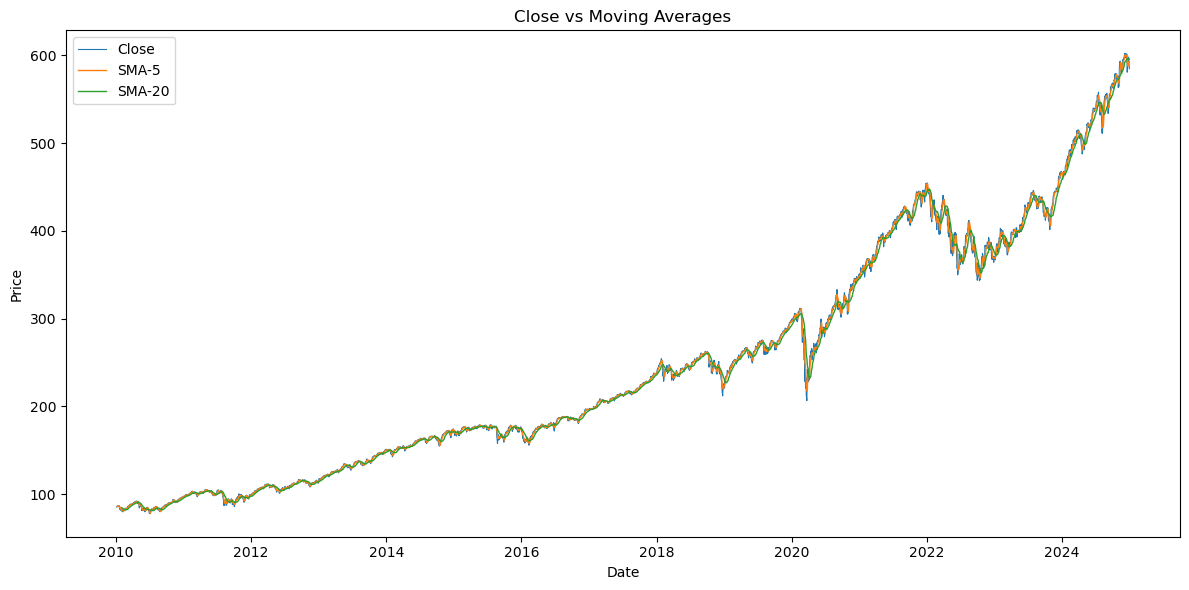

In [5]:
# (A) Close vs SMA-5 vs SMA-20
plt.figure(figsize=(12,6))
plt.plot(df["Date"], df["Close"],  linewidth=0.8, label="Close")
plt.plot(df["Date"], df["sma_5"],  linewidth=1.0, label="SMA-5")
plt.plot(df["Date"], df["sma_20"], linewidth=1.0, label="SMA-20")
plt.title("Close vs Moving Averages")
plt.xlabel("Date"); plt.ylabel("Price")
plt.legend(); plt.tight_layout(); plt.show()

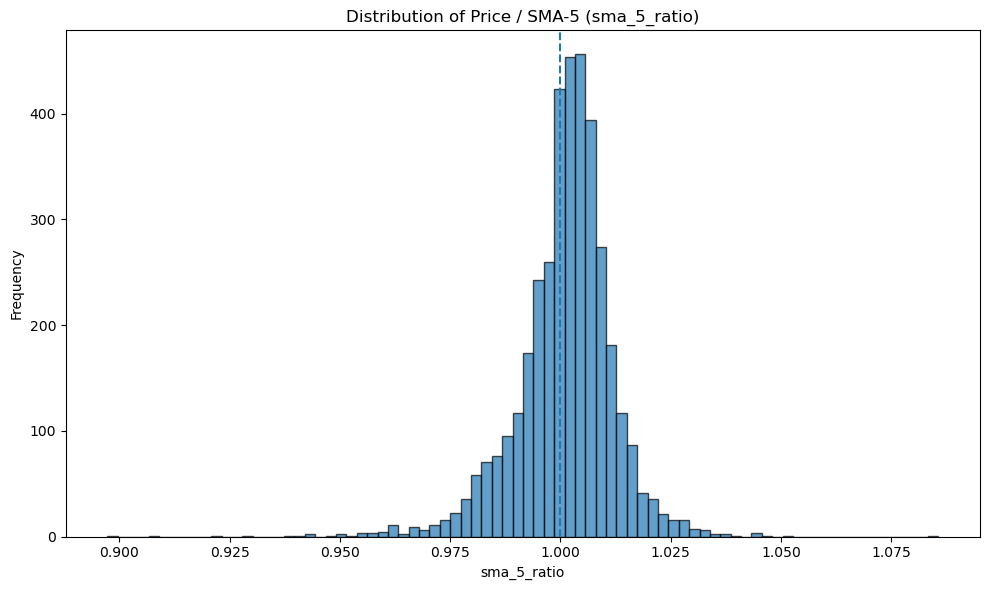

In [6]:
plt.figure(figsize=(10,6))
plt.hist(df["sma_5_ratio"].dropna(), bins=80, edgecolor="k", alpha=0.7)
plt.axvline(1.0, linestyle="--")
plt.title("Distribution of Price / SMA-5 (sma_5_ratio)")
plt.xlabel("sma_5_ratio"); plt.ylabel("Frequency")
plt.tight_layout(); plt.show()

<Figure size 700x500 with 0 Axes>

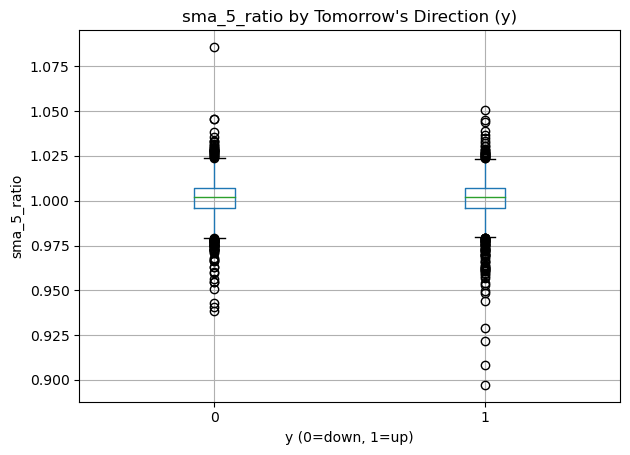

In [7]:
plt.figure(figsize=(7,5))
df.boxplot(column="sma_5_ratio", by="y")
plt.title("sma_5_ratio by Tomorrow's Direction (y)")
plt.suptitle("")
plt.xlabel("y (0=down, 1=up)"); plt.ylabel("sma_5_ratio")
plt.tight_layout(); plt.show()

In [8]:
os.makedirs(os.path.dirname(OUT_PATH), exist_ok=True)
df.to_csv(OUT_PATH, index=False)